In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## ExcelからDataを読み込む

/Users/tobiuo/learning/machine-learning/venv/lib/python3.8/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


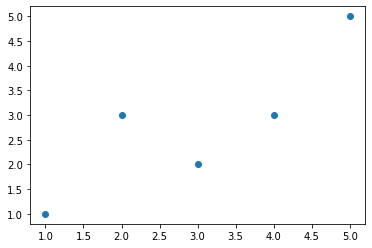

In [2]:
# Excel内の画像などは読み込めないというwarningが出るが, dataは読み込めているため無視する. 
data = pd.read_excel("02-SimpleLinearRegression.xlsx", usecols=[0,1], header=3)[:5].astype(np.float64)
plt.scatter(data.x, data.y)

## 最急降下法を20回行う

In [3]:
alpha = 0.01
epoch = 4
intercept = 0
slope = 0
# errorの様子を監視するためのlist
error_log = []

$intercept = intercept - alpha \times error$

$slope = slope - alpha \times error \times x$

In [4]:
for e in range(epoch):
    for d in data.itertuples():
        predict = intercept + slope * d.x
        error = predict - d.y
        intercept -= alpha * error
        slope -= alpha * error * d.x
        print(str(intercept) +"\t"+ str(slope))
        error_log.append(error)

0.01	0.01
0.039700000000000006	0.0694
0.066527	0.176708
0.08056049	0.21880847
0.1188144616	0.410078328
0.123525533704	0.414789400104
0.14399449036488	0.45572731342576
0.1543254529242008	0.4970511636630432
0.1578706634850675	0.5076867953456433
0.18090761708293468	0.6228715633349792
0.18286982527875553	0.6248337715308
0.19854445159535197	0.6561830241639929
0.20031168611283873	0.6632519622339399
0.19841101038469214	0.6575499350495001
0.2135494035283702	0.7332419007678904
0.2140814904854076	0.7337739877249279
0.22726519582605495	0.7601413984062226
0.2245868879315455	0.7494281668281848
0.2198581740473845	0.7352420251757018
0.23089749104812557	0.7904386101794071


## 学習中の誤差の推移

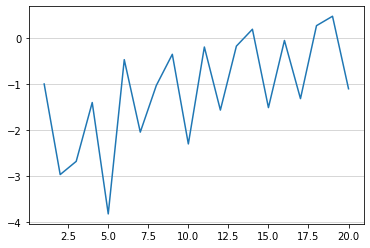

In [5]:
plt.grid(axis='y', lw=0.5)
plt.plot(np.arange(1, 21, step=1), error_log)

## 予測した関数を出力してみる

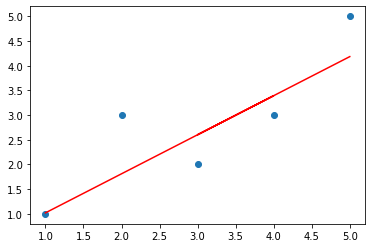

In [6]:
predict = intercept + slope * data.x
plt.scatter(data.x, data.y)
plt.plot(data.x, predict, color='red')

## 誤差を評価

In [7]:
rmse = np.sqrt(np.sum(np.square(predict - data.y)) / len(data))
rmse

0.7206264014789554